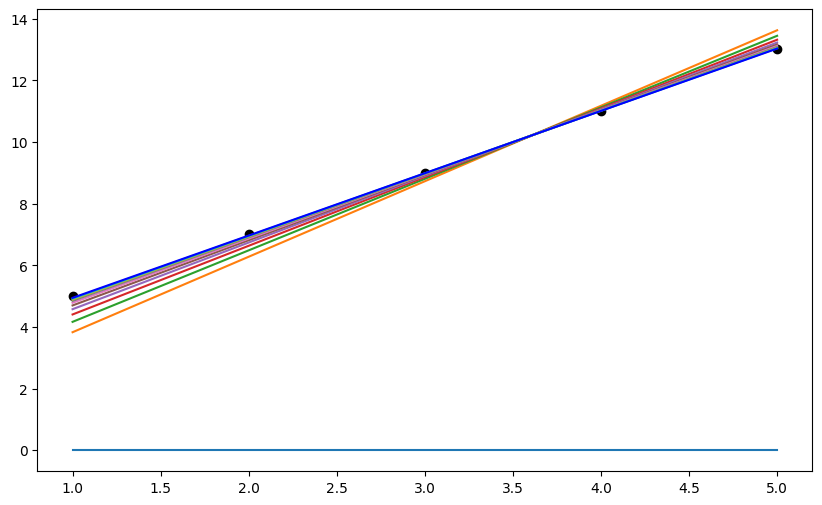

Final parameters: m = 2.021281045682893, b = 2.923168672645527


In [ ]:
# 1. Apply Gradient Descent Algorithm to minimize the cost function of a machine learning model

import numpy as np
import matplotlib.pyplot as plt

def mean_squared_error(y_true, y_pred) :
  n = len(y_true)
  cost = (1/n) * sum((y_true - y_pred)**2)
  return cost

def gradient_descent_visualized(x, y, learning_rate=0.001, iterations=10000):
    m_curr = b_curr = 0 
    n = len(x)
    
    plt.figure(figsize=(10, 6))
    
    for i in range(iterations):
        y_pred = m_curr * x + b_curr 
        cost = mean_squared_error(y, y_pred)
        
        md = -(2/n) * sum(x * (y - y_pred))
        bd = -(2/n) * sum(y - y_pred)
        
        m_curr -= learning_rate * md
        b_curr -= learning_rate * bd
        # print(f"m: {m_curr} \tb: {b_curr} \titeration: {i} \tcost: {cost}")
        
        if i % 100 == 0:
            plt.plot(x, y_pred)
    
    plt.scatter(x, y, color='black')
    plt.plot(x, m_curr * x + b_curr, color='blue')
    
    plt.show()
    
    print(f"Final parameters: m = {m_curr}, b = {b_curr}")

x = np.array([1,2,3,4,5])
y = np.array([5,7,9,11,13])

gradient_descent_visualized(x, y, learning_rate=0.01, iterations=1000)


Accuracy: 0.94


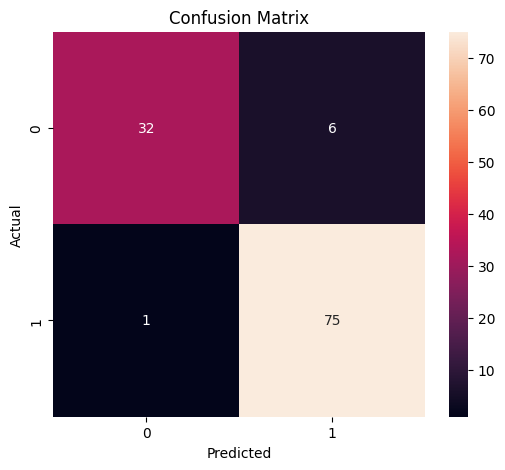

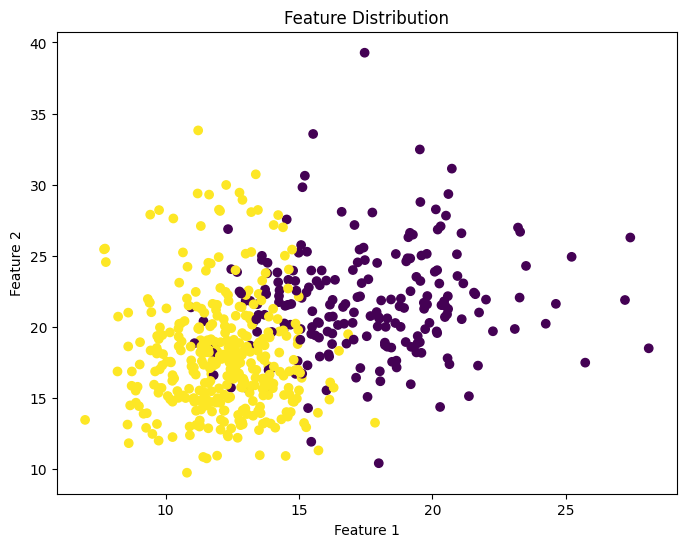

In [ ]:
# 2. Implement SVM for Image Classification. Create a dataset of your own with three classes 

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=64)

model = SVC(C=100, kernel='rbf')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Feature Distribution')
plt.show()


In [ ]:
# 3. Implement Back propagation algorithm using neural networks 

import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

input_neurons = 2
hidden_neurons = 4
output_neurons = 1
weights_input_hidden = np.random.uniform(size=(input_neurons, hidden_neurons))
weights_hidden_output = np.random.uniform(size=(hidden_neurons, output_neurons))
bias_hidden = np.random.uniform(size=(1, hidden_neurons))
bias_output = np.random.uniform(size=(1, output_neurons))
learning_rate = 0.5
epochs = 10000

for epoch in range(epochs):

    hidden_layer_input = np.dot(X, weights_input_hidden) + bias_hidden

    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output

    predicted_output = sigmoid(output_layer_input)

    error = y - predicted_output

    d_predicted_output = error * sigmoid_derivative(predicted_output)

    error_hidden_layer = d_predicted_output.dot(weights_hidden_output.T)

    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

    weights_hidden_output += hidden_layer_output.T.dot(d_predicted_output) * learning_rate

    weights_input_hidden += X.T.dot(d_hidden_layer) * learning_rate

    bias_output += np.sum(d_predicted_output, axis=0, keepdims=True) * learning_rate

    bias_hidden += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate

    if epoch % 1000 == 0:

        print(f"Epoch {epoch}, Error: {np.mean(np.abs(error))}")

print("Final Predicted Output:")

print(np.round(predicted_output))

Epoch 0, Error: 0.498188895310518
Epoch 1000, Error: 0.13030979674829501
Epoch 2000, Error: 0.04814884763608324
Epoch 3000, Error: 0.033447785387118005
Epoch 4000, Error: 0.026832743222227548
Epoch 5000, Error: 0.022926874744895347
Epoch 6000, Error: 0.020292594082234734
Epoch 7000, Error: 0.018369233066180334
Epoch 8000, Error: 0.016888835052864284
Epoch 9000, Error: 0.015705661962541653
Final Predicted Output:
[[0.]
 [1.]
 [1.]
 [0.]]


In [56]:
# 4. Apply Regularization Techniques to reduce overfitting in Machine Learning  

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.activations import relu, sigmoid, softmax
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

X = np.random.rand(100, 10)
y = np.random.randint(0,2, 100)


model = Sequential([
    Dense(10, activation=relu, input_shape=(X.shape[1], ), kernel_regularizer=l1(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(65, activation=relu, kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1, activation=sigmoid)
])

model.compile(optimizer=Adam(learning_rate=0.01), loss=BinaryCrossentropy, metrics=['accuracy'])
model.fit(X, y, validation_split=0.2, epochs=50, batch_size=32)

Epoch 1/50


c:\Users\R.PRAVEEN KUMAR\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 217ms/step - accuracy: 0.5219 - loss: 1.3410 - val_accuracy: 0.5500 - val_loss: 1.0922
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4578 - loss: 1.1904 - val_accuracy: 0.5500 - val_loss: 1.0666
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4922 - loss: 1.2718 - val_accuracy: 0.5500 - val_loss: 1.0494
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6078 - loss: 1.0924 - val_accuracy: 0.5500 - val_loss: 1.0363
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5367 - loss: 1.2369 - val_accuracy: 0.5500 - val_loss: 1.0236
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5883 - loss: 1.0639 - val_accuracy: 0.5500 - val_loss: 1.0140
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5406 - loss: 1.1279 - val_accuracy: 0.5500 - val_loss: 1.0071
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.4547 - loss: 1.1827 - val_accuracy: 0.5500 - val_loss: 1.0020
Epoch 9/50

In [1]:
# 5. Apply Regularization Techniques to reduce overfitting in Deep Learning  

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.activations import relu, sigmoid, softmax
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

X = np.random.rand(1000, 10)
y = np.random.randint(0,2, 1000)


model = Sequential([
    Dense(10, activation=relu, input_shape=(X.shape[1], ), kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(65, activation=relu, kernel_regularizer=l1(0.01)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1, activation=sigmoid)
])

model.compile(optimizer=Adam(learning_rate=0.01), loss=BinaryCrossentropy, metrics=['accuracy'])
model.fit(X, y, validation_split=0.2, epochs=50, batch_size=32)

c:\Users\R.PRAVEEN KUMAR\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.4850 - loss: 1.7562 - val_accuracy: 0.4950 - val_loss: 1.2379
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5058 - loss: 1.2659 - val_accuracy: 0.4900 - val_loss: 1.0500
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4884 - loss: 1.0519 - val_accuracy: 0.4950 - val_loss: 0.9210
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4750 - loss: 0.9332 - val_accuracy: 0.5500 - val_loss: 0.8479
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4983 - loss: 0.8378 - val_accuracy: 0.5100 - val_loss: 0.8042
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4621 - loss: 0.8127 - val_accuracy: 0.4950 - val_loss: 0.7771
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4992 - loss: 0.7780 - val_accuracy: 0.4900 - val_loss: 0.7598
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5288 - loss: 0.7576 - val_accuracy: 0.5100 - val_loss

In [ ]:
# 6. / 7. Implement Adaptive learning rate algorithms-Adam, Adagrad, Adadelta andRMSProp Analyse
# the results of implementing Adaptive learning rate algorithms-Adam, Adagrad, Adadelta and RMSProp

import numpy as np
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split

x = np.array([[1,1], [2, 3], [4, 5], [6, 7], [8, 9]])
y = np.array([2, 5, 9, 13, 17])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)


model_adam = Sequential()
model_adam.add(Dense(units=1, activation='linear'))
model_adam.compile(optimizer='adam', loss='mean_squared_error')
model_adam.fit(x_train, y_train, epochs=3, batch_size=2)
adam_loss = model_adam.evaluate(x_test, y_test)
print("Adam Loss: ", adam_loss)


model_rms = Sequential()
model_rms.add(Dense(units=1, activation='linear'))
model_rms.compile(optimizer='RMSprop', loss='mean_squared_error')
model_rms.fit(x_train, y_train, epochs=3, batch_size=2)
rms_loss = model_rms.evaluate(x_test, y_test)
print("RMSprop Loss: ", rms_loss)


model_adadelta = Sequential()
model_adadelta.add(Dense(units=1, activation='linear'))
model_adadelta.compile(optimizer='Adadelta', loss='mean_squared_error')
model_adadelta.fit(x_train, y_train, epochs=3, batch_size=2)
adadelta_loss = model_adadelta.evaluate(x_test, y_test)
print("AdaDelta Loss: ", adadelta_loss)


model_adagrad = Sequential()
model_adagrad.add(Dense(units=1, activation='linear'))
model_adagrad.compile(optimizer='Adagrad', loss='mean_squared_error')
model_adagrad.fit(x_train, y_train, epochs=3, batch_size=2)
adagrad_loss = model_adagrad.evaluate(x_test, y_test)
print("AdaGrad Loss: ", adagrad_loss)

Epoch 1/3
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 155.0604  
Epoch 2/3
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 115.19504
Epoch 3/3
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 96.7438
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 226.8438
Adam Loss:  226.84376525878906
Epoch 1/3
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 94.1948  
Epoch 2/3
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 165.7948
Epoch 3/3
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 93.0536  
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 217.3866
RMSprop Loss:  217.38656616210938
Epoch 1/3
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 99.0802  
Epoch 2/3
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 112.2012
Epoch 3/3
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 116.22347
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 236.4974
AdaDelta Loss:  236.49737548828125
Epoch 1/3
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0578  
Epoch 2/3
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.5825
Epoch 3/3
2/2 ━━━━━━━━━━━━━

In [ ]:
# 8. Build a CNN classification model for Image Recognition using tensorflow

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Load and preprocess CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Create the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.3f}')

# Load and preprocess the image for prediction
img = load_img('OIP.jpeg', target_size=(32, 32))  # Ensure 'OIP.jpeg' is in your working directory
img_array = img_to_array(img)
img_array = img_array.astype('float32') / 255.0
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Make a prediction
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)

# Print predicted class label
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print(f'Predicted class: {predicted_class[0]}')
print(f'Predicted label: {labels[predicted_class[0]]}')


In [ ]:
# 9. . Build a CNN classification model for recognition of hand-written digits using tensor flow

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode the labels
y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)

# Build the model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.30))
model.add(BatchNormalization())

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.30))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=120, validation_split=0.20, callbacks=[early_stopping])

# Evaluate the model
loss, acc = model.evaluate(x_test, y_test)
print("Accuracy: ", acc)

# Function to preprocess the image for prediction
def preprocess_image(image_path):
    img = load_img(image_path, color_mode='grayscale', target_size=(28, 28))  # Resize and convert to grayscale
    img_array = img_to_array(img) / 255.0  # Normalize pixel values between 0 and 1
    img_array = img_array.reshape(1, 28, 28, 1)  # Reshape to match model input shape (1, 28, 28, 1)
    return img_array

# Path to the image you want to classify
image_path = 'Screenshot 2025-03-30 225819.png'  # Make sure this file path is correct

# Preprocess the image
img_array = preprocess_image(image_path)

# Make a prediction
predictions = model.predict(img_array)
predicted_digit = np.argmax(predictions)

print(f"The predicted digit is: {predicted_digit}")


In [ ]:
# 10. Build a classification model for text classification using Recurrent Neural Networks  and
# 11. Apply RNN to classify movie reviews labeled as positive or negative

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense, Dropout
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer

# Set parameters
max_features = 10000
max_len = 100

# Load and preprocess the data
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

# Build the RNN model
model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=128, input_length=max_len))
model.add(SimpleRNN(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

# Define the sentiment prediction function
def predict_sentiment(text_input):
    # Load Tokenizer and fit on training data
    tokenizer = Tokenizer(num_words=max_features)
    tokenizer.fit_on_texts([text_input])  # Fit tokenizer on the input text (or use existing fit from training data)

    # Convert the input text to sequences and pad
    seq = tokenizer.texts_to_sequences([text_input])
    padded_seq = pad_sequences(seq, maxlen=X_train.shape[1])

    # Make prediction
    prediction = model.predict(padded_seq)
    sentiment = "positive" if prediction >= 0.5 else "negative"
    return sentiment

# Test the function
new_review = "I love this product, it's amazing!"
predicted_sentiment = predict_sentiment(new_review)
print(f"Predicted Sentiment: {predicted_sentiment}")


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


c:\Users\R.PRAVEEN KUMAR\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 26s 59ms/step - accuracy: 0.5683 - loss: 0.7056 - val_accuracy: 0.7586 - val_loss: 0.4967
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 54ms/step - accuracy: 0.7977 - loss: 0.4570 - val_accuracy: 0.8006 - val_loss: 0.4390
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 56ms/step - accuracy: 0.8677 - loss: 0.3227 - val_accuracy: 0.8272 - val_loss: 0.4166
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 55ms/step - accuracy: 0.9026 - loss: 0.2549 - val_accuracy: 0.8193 - val_loss: 0.4136
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 24s 61ms/step - accuracy: 0.9297 - loss: 0.1858 - val_accuracy: 0.8240 - val_loss: 0.4371
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.8235 - loss: 0.4446
Test Loss: 0.43714261054992676
Test Accuracy: 0.8240399956703186
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step
Predicted Sentiment: positive


In [ ]:
# 12. Implement the text pre-processing activities done for implementing RNN

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.optimizers import Adam

# Load the IMDB dataset and pre-process it
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=1000)

# Pad the sequences to ensure uniform input size
x_train = pad_sequences(x_train, maxlen=100)
x_test = pad_sequences(x_test, maxlen=100)

# Build the RNN model
model = Sequential()
model.add(Embedding(input_dim=1000, output_dim=128))  # Embedding layer
model.add(SimpleRNN(128, return_sequences=True))  # First SimpleRNN layer
model.add(SimpleRNN(128))  # Second SimpleRNN layer
model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid for binary classification

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))

# Initialize the Tokenizer (fit it on the training data)
t = Tokenizer(num_words=1000)  # Tokenizer to handle the words
t.fit_on_texts([rev for rev in imdb.get_word_index()])  # Fit tokenizer on the word index

# Function to predict sentiment for a given review
def predict_sentiment(rev):
    rev_seq = t.texts_to_sequences([rev])  # Convert text to sequence
    rev_pad = pad_sequences(rev_seq, maxlen=100)  # Pad the sequence to match the model input size
    pred = model.predict(rev_pad)  # Make the prediction
    return 'positive' if pred >= 0.5 else 'negative'

# Test the function with a sample review
rev = 'I hate this movie. Waste of time.'
sent = predict_sentiment(rev)
print(sent)


In [ ]:
# 13. Implement a LSTM neural network model for generating news headlines 

import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load and preprocess data
df = pd.read_csv("news_headlines.csv")
headlines = df['headline'].astype(str).values

# Tokenization
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(headlines)

sequences = tokenizer.texts_to_sequences(headlines)
max_len = 20  # Maximum length of sequences
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')

# Preparing training data
X = padded_sequences[:, :-1]  # Input: all words except last
y = padded_sequences[:, -1]   # Target: last word

num_classes = len(tokenizer.word_index) + 1  # Number of unique words
y = np.eye(num_classes)[y]  # One-hot encoding

# Define LSTM model
model = Sequential([
    Embedding(input_dim=num_classes, output_dim=256, input_length=max_len-1),
    LSTM(128, return_sequences=False),
    Dense(num_classes, activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
model.fit(X, y, epochs=10, batch_size=64)

# Headline generation function
def generate_headline(seed_text, max_words=10):
    for _ in range(max_words):
        tokenized_input = tokenizer.texts_to_sequences([seed_text])
        padded_input = pad_sequences(tokenized_input, maxlen=max_len-1, padding='post')
        
        predicted_word_index = np.argmax(model.predict(padded_input), axis=-1)[0]
        predicted_word = tokenizer.index_word.get(predicted_word_index, "")

        if not predicted_word:
            break  # Stop if no word is predicted

        seed_text += " " + predicted_word
    
    return seed_text

# Generate a new headline
seed = "Breaking news"
generated_headline = generate_headline(seed, max_words=10)
print("Generated Headline:", generated_headline)

In [ ]:
# 14. Implement LSTM for text classification(spam/ham) 

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.models import Sequential

# Load and preprocess data
data = pd.read_csv("spam_data.csv")  # Ensure the correct filename
x = data['Message']
y = data['Category']

# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x)

seq = tokenizer.texts_to_sequences(x)
x = pad_sequences(seq, maxlen=100)

# Convert 'spam' to 1 and 'ham' to 0
y = np.array([1 if i.lower() == 'spam' else 0 for i in y])

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=34)

# Define LSTM model
model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=100),
    LSTM(128, return_sequences=False),  # No need for Flatten layer
    Dense(1, activation='sigmoid')
])

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
history = model.fit(x_train, y_train, epochs=5, batch_size=33)

# Spam prediction function
def predict_msg(msg):
    seq = tokenizer.texts_to_sequences([msg])
    msg_pad = pad_sequences(seq, maxlen=100)
    pred = model.predict(msg_pad)[0][0]  # Get scalar value from prediction
    return 'spam' if pred >= 0.5 else 'ham'

# Example message
msg = "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)"
print("Prediction:", predict_msg(msg))

In [6]:
###  15. Build a deep learning model for multi digit number recognition 


import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define and train the MNIST model
def create_mnist_model():
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2,2)),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D((2,2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Load MNIST dataset and train the model
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

mnist_model = create_mnist_model()
mnist_model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Preprocess the image
def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.GaussianBlur(img, (5,5), 0)
    _, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    kernel = np.ones((3,3), np.uint8)
    thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
    return thresh

# Find contours and extract digits
def extract_digits(thresh_img):
    contours, _ = cv2.findContours(thresh_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    digit_images = []

    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        if w > 5 and h > 10:  # Ignore small contours
            digit = thresh_img[y:y+h, x:x+w]
            square_size = max(h, w)
            padded_digit = np.zeros((square_size, square_size), dtype=np.uint8)
            y_offset = (square_size - h) // 2
            x_offset = (square_size - w) // 2
            padded_digit[y_offset:y_offset + h, x_offset:x_offset + w] = digit
            digit = cv2.resize(padded_digit, (28, 28))  # Resize to 28x28
            digit = digit.astype('float32') / 255.0  # Normalize
            digit_images.append((x, digit))

    # Sort digits by x position (left to right)
    digit_images = sorted(digit_images, key=lambda x: x[0])
    return [img for _, img in digit_images]

# Predict digits using MNIST model
def recognize_digits(digit_images):
    digits = []
    for digit in digit_images:
        digit = np.expand_dims(digit, axis=(0, -1))  # Reshape for model input
        prediction = np.argmax(mnist_model.predict(digit), axis=-1)[0]
        digits.append(str(prediction))
    return "".join(digits)

# Main function
def recognize_number(image_path):
    thresh_img = preprocess_image(image_path)
    digit_images = extract_digits(thresh_img)
    if not digit_images:
        return "No digits found"
    return recognize_digits(digit_images)

# Example usage
image_path = "Screenshot.jpg"
print("Recognized Number:", recognize_number(image_path))


c:\Users\R.PRAVEEN KUMAR\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.8679 - loss: 0.4283 - val_accuracy: 0.9830 - val_loss: 0.0497
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9754 - loss: 0.0838 - val_accuracy: 0.9870 - val_loss: 0.0379
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9810 - loss: 0.0626 - val_accuracy: 0.9895 - val_loss: 0.0328
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9858 - loss: 0.0484 - val_accuracy: 0.9891 - val_loss: 0.0336
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9876 - loss: 0.0413 - val_accuracy: 0.9908 - val_loss: 0.0275
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
Recognized Number: 8


In [ ]:
# 16. Build a deep learning model for image classification that uses the concept of transfer 
# learning(VGGNET,Efficientnet and MobileNet) 


import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, GlobalAveragePooling2D
import tensorflow_datasets as tfds
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# Load the dataset
train_data, test_data = tfds.load('horses_or_humans', split=['train', 'test'], as_supervised=True)

# Preprocess function
def preprocess_img(image, label):
    image = tf.image.resize(image, (224, 224))  # Resize for MobileNetV2
    image = preprocess_input(image)  # Apply MobileNetV2 preprocessing
    return image, label

# Apply preprocessing
train_data = train_data.map(preprocess_img).cache().shuffle(1000).batch(32).prefetch(tf.data.experimental.AUTOTUNE)
test_data = test_data.map(preprocess_img).batch(32).prefetch(tf.data.experimental.AUTOTUNE)

# Load the pre-trained MobileNetV2 model (without the top classifier)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
base_model.trainable = False

# Define the model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),  # Convert feature maps into a single vector
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_data,
    epochs=3,
    validation_data=test_data
)

# Plot accuracy and loss
def plot_history(history):
    plt.figure(figsize=(12, 4))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.title('Model Accuracy')

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.title('Model Loss')

    plt.show()

plot_history(history)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

In [1]:
# 17. Build a encoder decoder architecture for any NLP task 

import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense
from tensorflow.keras.utils import to_categorical

# Hyperparameters
vocab_size = 10000
encoder_input_length = 20
decoder_input_length = 20
embedding_dim = 256
lstm_units = 128

# Encoder
encoder_inputs = Input(shape=(encoder_input_length,))
encoder_embedding = Embedding(input_dim=vocab_size, output_dim=embedding_dim)(encoder_inputs)
encoder_lstm, state_h, state_c = LSTM(lstm_units, return_state=True)(encoder_embedding)
encoder_states = [state_h, state_c]

# Decoder
decoder_inputs = Input(shape=(decoder_input_length,))
decoder_embedding = Embedding(input_dim=vocab_size, output_dim=embedding_dim)(decoder_inputs)
decoder_lstm = LSTM(lstm_units, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_embedding, initial_state=encoder_states)
decoder_dense = Dense(vocab_size, activation='softmax')(decoder_outputs)

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_dense)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Generate random training data
encoder_input_data = np.random.randint(1, vocab_size, size=(1000, encoder_input_length))
decoder_input_data = np.random.randint(1, vocab_size, size=(1000, decoder_input_length))

# Correct decoder output shape
decoder_output_data = np.random.randint(0, vocab_size, size=(1000, decoder_input_length))
decoder_output_data = to_categorical(decoder_output_data, num_classes=vocab_size)

# Train the model
model.fit([encoder_input_data, decoder_input_data], decoder_output_data, epochs=10, batch_size=64)

Epoch 1/10


c:\Users\R.PRAVEEN KUMAR\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor', 'keras_tensor_5']. Received: the structure of inputs=('*', '*')
  warnings.warn(


16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 461ms/step - accuracy: 3.9032e-04 - loss: 9.2103
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 314ms/step - accuracy: 0.0026 - loss: 9.1998
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 332ms/step - accuracy: 5.4704e-04 - loss: 9.0721
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 373ms/step - accuracy: 6.4872e-04 - loss: 8.9708
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 398ms/step - accuracy: 4.7361e-04 - loss: 8.8759
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 444ms/step - accuracy: 6.9181e-04 - loss: 8.8104
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 308ms/step - accuracy: 5.9074e-04 - loss: 8.7799
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 306ms/step - accuracy: 7.1778e-04 - loss: 8.6883
Epoch 9/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 383ms/step - accuracy: 7.0902e-04 - loss: 8.6386
Epoch 10/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 339ms/step - accuracy: 6.6413e-04 - loss: 8.5864


In [2]:
# 18. Implement RNN and Bidirectional RNN . Compare the results


import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Bidirectional, Dense, Embedding
from sklearn.metrics import accuracy_score

# Hyperparameters
vocab_size = 10000
max_len = 100

# Load IMDB dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# Pad sequences
x_train = pad_sequences(x_train, maxlen=max_len, padding='post')
x_test = pad_sequences(x_test, maxlen=max_len, padding='post')

# RNN Model
rnn_model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=64, input_length=max_len),
    SimpleRNN(128, activation='tanh'),  # Fix activation
    Dense(1, activation='sigmoid')
])

rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
rnn_model.fit(x_train, y_train, epochs=5, batch_size=64, verbose=1)

# Predictions & Evaluation for RNN
rnn_predictions = (rnn_model.predict(x_test) > 0.5).astype(int).flatten()  # Ensure 1D
rnn_accuracy = accuracy_score(y_test, rnn_predictions)

# Bidirectional RNN Model
bidir_rnn_model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=64, input_length=max_len),
    Bidirectional(SimpleRNN(128, activation='tanh')),  # Fix activation
    Dense(1, activation='sigmoid')
])

bidir_rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
bidir_rnn_model.fit(x_train, y_train, epochs=5, batch_size=64, verbose=1)

# Predictions & Evaluation for Bidirectional RNN
bidir_rnn_predictions = (bidir_rnn_model.predict(x_test) > 0.5).astype(int).flatten()  # Ensure 1D
bidir_rnn_accuracy = accuracy_score(y_test, bidir_rnn_predictions)

# Print results
print(f"RNN Accuracy: {rnn_accuracy:.2f}")
print(f"Bidirectional RNN Accuracy: {bidir_rnn_accuracy:.2f}")


Epoch 1/5


c:\Users\R.PRAVEEN KUMAR\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


391/391 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - accuracy: 0.5360 - loss: 0.6874
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 47ms/step - accuracy: 0.7077 - loss: 0.5737
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 54ms/step - accuracy: 0.7751 - loss: 0.4639
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 17s 44ms/step - accuracy: 0.7432 - loss: 0.5193
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 23s 51ms/step - accuracy: 0.7652 - loss: 0.4864
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step
Epoch 1/5


c:\Users\R.PRAVEEN KUMAR\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


391/391 ━━━━━━━━━━━━━━━━━━━━ 28s 61ms/step - accuracy: 0.5101 - loss: 0.6996
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 55ms/step - accuracy: 0.6916 - loss: 0.5890
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 57ms/step - accuracy: 0.7902 - loss: 0.4712
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 16s 41ms/step - accuracy: 0.8082 - loss: 0.4527
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 52ms/step - accuracy: 0.7901 - loss: 0.4754
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step
RNN Accuracy: 0.63
Bidirectional RNN Accuracy: 0.73
